The numerical values of the metrics may change when executing the notebook but the overall result (like determining winning individual models) are the same .

In [81]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random

In [82]:
seed = np.random.seed(22)
random.seed(22)

In [83]:
df = pd.read_csv('/Users/diegomaldonadocastro/Desktop/semestre 4/BaseballAverage.csv')

In [84]:
df.dtypes

Unnamed: 0         int64
playerID          object
inducted_x        object
needed_note_x     object
G_x              float64
AB               float64
R_x              float64
H_x              float64
2B               float64
3B               float64
HR_x             float64
RBI              float64
SB               float64
CS               float64
BB_x             float64
SO_x             float64
IBB_x            float64
HBP_x            float64
SH_x             float64
SF_x             float64
GIDP_x           float64
inducted_y        object
needed_note_y     object
W                float64
L                float64
G_y              float64
GS               float64
CG               float64
SHO              float64
SV               float64
IPouts           float64
H_y              float64
ER               float64
HR_y             float64
BB_y             float64
SO_y             float64
BAOpp            float64
ERA              float64
IBB_y            float64
WP               float64


In [85]:
for i in df:
    print(i, df[i].isnull().sum())

Unnamed: 0 0
playerID 0
inducted_x 0
needed_note_x 1278
G_x 26
AB 26
R_x 26
H_x 26
2B 26
3B 26
HR_x 26
RBI 27
SB 27
CS 155
BB_x 26
SO_x 27
IBB_x 426
HBP_x 34
SH_x 52
SF_x 422
GIDP_x 261
inducted_y 0
needed_note_y 1278
W 765
L 765
G_y 765
GS 765
CG 765
SHO 765
SV 765
IPouts 765
H_y 765
ER 765
HR_y 765
BB_y 765
SO_y 765
BAOpp 828
ERA 767
IBB_y 956
WP 765
HBP_y 779
BK 765
BFP 765
GF 765
R_y 765
SH_y 1001
SF_y 1001
GIDP_y 1008


In [86]:
df = df.drop(['needed_note_x','inducted_y','needed_note_y','Unnamed: 0','playerID','G_x','G_y','GIDP_x','GS','CG','IBB_y','SF_y','SH_y','GIDP_y','GF'],axis=1)

In [87]:
df.dtypes

inducted_x     object
AB            float64
R_x           float64
H_x           float64
2B            float64
3B            float64
HR_x          float64
RBI           float64
SB            float64
CS            float64
BB_x          float64
SO_x          float64
IBB_x         float64
HBP_x         float64
SH_x          float64
SF_x          float64
W             float64
L             float64
SHO           float64
SV            float64
IPouts        float64
H_y           float64
ER            float64
HR_y          float64
BB_y          float64
SO_y          float64
BAOpp         float64
ERA           float64
WP            float64
HBP_y         float64
BK            float64
BFP           float64
R_y           float64
dtype: object

In [88]:
df = df.fillna(0)

### Importando los modelos

In [89]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [90]:
X = df.iloc[:, 1:]
y = df.iloc[:,:1]

In [91]:
X

,AB,R_x,H_x,2B,3B,HR_x,RBI,SB,CS,BB_x,...,HR_y,BB_y,SO_y,BAOpp,ERA,WP,HBP_y,BK,BFP,R_y
0,537.565217,94.521739,163.956522,27.130435,4.260870,32.826087,99.869565,10.434783,3.173913,60.956522,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.909091,0.000000,0.181818,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,...,14.000000,56.363636,80.727273,0.280364,4.496364,4.818182,2.909091,1.000000,655.545455,80.000000
2,424.000000,72.650000,123.500000,28.700000,2.950000,14.400000,68.150000,20.000000,6.400000,73.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,53.631579,4.157895,11.368421,1.631579,0.789474,0.157895,3.947368,0.052632,0.166667,2.789474,...,3.578947,22.631579,54.526316,0.256667,3.733684,1.368421,2.473684,0.105263,628.789474,59.421053
4,267.933333,39.400000,72.133333,12.533333,3.266667,2.466667,20.200000,4.466667,3.000000,27.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,57.750000,6.250000,13.750000,2.166667,0.250000,2.000000,5.916667,0.083333,0.000000,0.833333,...,13.416667,74.833333,136.416667,0.247333,4.643333,4.833333,8.500000,0.416667,699.083333,73.250000
1285,360.619048,46.952381,95.428571,18.904762,1.095238,12.047619,52.857143,2.523810,2.428571,45.000000,...,0.000000,1.000000,0.500000,0.452000,22.500000,0.000000,0.000000,0.000000,6.000000,2.500000
1286,227.300000,30.850000,61.250000,11.100000,3.800000,1.300000,31.250000,7.947368,0.000000,19.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1287,395.692308,52.384615,113.615385,18.846154,2.000000,15.923077,60.923077,0.615385,1.153846,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [92]:
y

,inducted_x
0,Y
1,N
2,N
3,N
4,N
...,...
1284,N
1285,N
1286,N
1287,N


In [93]:
columns_X = list(X.columns)


In [94]:
mms = MinMaxScaler()

In [95]:
X[columns_X]= mms.fit_transform(X[columns_X])

In [96]:
X.fillna(0,inplace=True)

In [97]:
X

,AB,R_x,H_x,2B,3B,HR_x,RBI,SB,CS,BB_x,...,HR_y,BB_y,SO_y,BAOpp,ERA,WP,HBP_y,BK,BFP,R_y
0,0.890500,0.779790,0.853940,0.753623,0.261995,0.947735,0.844700,0.159833,0.182671,0.524255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003162,0.000000,0.000947,0.000000,0.000000,0.000000,0.002307,0.000000,0.000000,0.000000,...,0.515337,0.330191,0.381455,0.054670,0.166532,0.218017,0.128342,0.300000,0.360643,0.312849
2,0.702374,0.599352,0.643229,0.797222,0.181392,0.415748,0.576415,0.306346,0.368345,0.634715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.088843,0.034302,0.059211,0.045322,0.048544,0.004559,0.033387,0.000806,0.009592,0.023991,...,0.131740,0.132581,0.257650,0.050049,0.138285,0.061920,0.109133,0.031579,0.345923,0.232373
4,0.443843,0.325044,0.375694,0.348148,0.200863,0.071216,0.170852,0.068417,0.172662,0.237373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0.095665,0.051562,0.071615,0.060185,0.015372,0.057743,0.050043,0.001276,0.000000,0.007167,...,0.493865,0.438391,0.644601,0.048229,0.171975,0.218703,0.375000,0.125000,0.384595,0.286453
1285,0.597381,0.387350,0.497024,0.525132,0.067345,0.347832,0.447068,0.038658,0.139774,0.387021,...,0.000000,0.005858,0.002363,0.088138,0.833333,0.000000,0.000000,0.000000,0.003301,0.009777
1286,0.376532,0.254508,0.319010,0.308333,0.233657,0.037533,0.264314,0.121732,0.000000,0.167709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1287,0.655481,0.432165,0.591747,0.523504,0.122977,0.459721,0.515290,0.009426,0.066408,0.352619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [98]:
le = LabelEncoder()

In [99]:
le = LabelEncoder()

y_encoded = le.fit_transform(y['inducted_x'])

y['inducted_x'] = y_encoded

/var/folders/kk/mwc0h__94pqcmz728gkj14x40000gn/T/ipykernel_30408/815894878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['inducted_x'] = y_encoded


In [100]:
y

,inducted_x
0,1
1,0
2,0
3,0
4,0
...,...
1284,0
1285,0
1286,0
1287,0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)


In [102]:
len(y_train)

863

In [103]:
SupportVector = SVC(probability=True)
KNN = KNeighborsClassifier(n_neighbors = 5,weights='distance')
Logistic_Regression = LogisticRegression()
Gaussian = GaussianNB()
Decision_Tree = DecisionTreeClassifier()

In [104]:
SupportVector.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [105]:
KNN.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(weights='distance')

In [106]:
Logistic_Regression.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [107]:
Gaussian.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [108]:
Decision_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
y_pred = SupportVector.predict(X_test)

In [110]:
y_pred_dec = KNN.predict(X_test)

In [111]:
y_pred_LR = Logistic_Regression.predict(X_test)

In [112]:
y_pred_GB = Gaussian.predict(X_test)

In [113]:
y_pred_tree = Decision_Tree.predict(X_test)

In [114]:
from sklearn.ensemble import VotingClassifier

In [115]:
voter_ensemble = VotingClassifier(estimators=[
    ('svc', SupportVector),
    ('knn', KNN),
    ('logistic', Logistic_Regression),
    ('tree', Decision_Tree),
    ('Naive',Gaussian)
],voting='soft')

In [116]:
voter_ensemble.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('knn', KNeighborsClassifier(weights='distance')),
                             ('logistic', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('Naive', GaussianNB())],
                 voting='soft')

In [117]:
predictions = voter_ensemble.predict(X_test)


In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
clf = RandomForestClassifier(max_depth=200)

In [120]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=200)

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
clf2 = GradientBoostingClassifier(n_estimators=100)
clf2.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [123]:
graphic_df = pd.DataFrame(columns = ['model','metric','value'])

In [124]:
graphic_df

,model,metric,value


In [125]:
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

models = {
    'Support Vector Classifier': SupportVector,
    'KNN': KNN,
    'Logistic Regression': Logistic_Regression,
    'Gaussian': Gaussian,
    'Decision Tree': Decision_Tree
}

In [126]:
def make_random_samples(X_sampling,n):
    sampled_X_test = X_sampling.sample(n)

    
    return sampled_X_test

In [127]:
def calculate_metrics(model, X_sample, y_sample):
    predictions = model.predict(X_sample)
    balanced_acc = balanced_accuracy_score(y_sample, predictions)
    f1_weighted = f1_score(y_sample, predictions, average='weighted', zero_division=0)
    precision_weighted = precision_score(y_sample, predictions, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_sample, predictions, average='weighted', zero_division=0)
    
    return balanced_acc, f1_weighted, precision_weighted, recall_weighted


In [128]:
acc,f1,prec,recall = calculate_metrics(SupportVector,X_test,y_test)
print('Balanced Accuracy:',acc)
print('Weighted F1:',f1)
print('Weighted Precision:',prec)
print('Weighted Recall:',recall)

Balanced Accuracy: 0.716106014271152
Weighted F1: 0.8424867339803767
Weighted Precision: 0.8689451523958567
Weighted Recall: 0.8615023474178404


In [129]:
acc,f1,prec,recall = calculate_metrics(SupportVector,X_test,y_test)
print('Support Vector Classifier')
print('Balanced Accuracy:',acc)
print('Weighted F1:',f1)
print('Weighted Precision:',prec)
print('Weighted Recall:',recall)
print('- - - - - - - - - - - - - - - - - - - - - - -')
acc_2,f1_2,prec_2,recall_2 = calculate_metrics(KNN,X_test,y_test)
print('K-Nearest Neighbots')
print('Balanced Accuracy:',acc_2)
print('Weighted F1:',f1_2)
print('Weighted Precision:',prec_2)
print('Weighted Recall:',recall_2)
print('- - - - - - - - - - - - - - - - - - - - - - -')
acc_3,f1_3,prec_3,recall_3 = calculate_metrics(Logistic_Regression,X_test,y_test)
print('Logistic Regression')
print('Balanced Accuracy:',acc_3)
print('Weighted F1:',f1_3)
print('Weighted Precision:',prec_3)
print('Weighted Recall:',recall_3)
print('- - - - - - - - - - - - - - - - - - - - - - -')
acc_5,f1_5,prec_5,recall_5 = calculate_metrics(Gaussian,X_test,y_test)
print('Gaussian Naive Bayes')
print('Balanced Accuracy:',acc_5)
print('Weighted F1:',f1_5)
print('Weighted Precision:',prec_5)
print('Weighted Recall:',recall_5)
print('- - - - - - - - - - - - - - - - - - - - - - -')
acc_4,f1_4,prec_4,recall_4 = calculate_metrics(Decision_Tree,X_test,y_test)
print('Decision Tree')
print('Balanced Accuracy:',acc_4)
print('Weighted F1:',f1_4)
print('Weighted Precision:',prec_4)
print('Weighted Recall:',recall_4)


Support Vector Classifier
Balanced Accuracy: 0.716106014271152
Weighted F1: 0.8424867339803767
Weighted Precision: 0.8689451523958567
Weighted Recall: 0.8615023474178404
- - - - - - - - - - - - - - - - - - - - - - -
K-Nearest Neighbots
Balanced Accuracy: 0.7058659994439811
Weighted F1: 0.8247700921172899
Weighted Precision: 0.8319108759609799
Weighted Recall: 0.8403755868544601
- - - - - - - - - - - - - - - - - - - - - - -
Logistic Regression
Balanced Accuracy: 0.6302474284125661
Weighted F1: 0.7833380851913099
Weighted Precision: 0.8300956412217693
Weighted Recall: 0.8215962441314554
- - - - - - - - - - - - - - - - - - - - - - -
Gaussian Naive Bayes
Balanced Accuracy: 0.6912241682883884
Weighted F1: 0.7761857052444141
Weighted Precision: 0.7778687514790871
Weighted Recall: 0.7746478873239436
- - - - - - - - - - - - - - - - - - - - - - -
Decision Tree
Balanced Accuracy: 0.7008618293021962
Weighted F1: 0.7847861401538063
Weighted Precision: 0.7855722300290701
Weighted Recall: 0.78403755

In [130]:
df_graph_models = pd.DataFrame(columns=['model','value','metric'])

In [131]:
random.seed(42)
for model_name, model in models.items():
    for _ in range(10):
        X_sampled = make_random_samples(X_test, 30)  # Assuming make_random_samples is a valid function
        y_sampled = y_test.loc[X_sampled.index]
        accuracy, F1, precision, recall = calculate_metrics(model, X_sampled, y_sampled)
        metrics = {'Accuracy': accuracy, 'F1': F1, 'Precision': precision, 'Recall': recall}
        for metric_name, value in metrics.items():
            df_graph_models = df_graph_models._append({'model': model_name, 'metric': metric_name, 'value': value}, ignore_index=True)


/var/folders/kk/mwc0h__94pqcmz728gkj14x40000gn/T/ipykernel_30408/4134023936.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_graph_models = df_graph_models._append({'model': model_name, 'metric': metric_name, 'value': value}, ignore_index=True)


In [132]:
df_graph_models

,model,value,metric
0,Support Vector Classifier,0.727273,Accuracy
1,Support Vector Classifier,0.819422,F1
2,Support Vector Classifier,0.829333,Precision
3,Support Vector Classifier,0.833333,Recall
4,Support Vector Classifier,0.750000,Accuracy
...,...,...,...
195,Decision Tree,0.600000,Recall
196,Decision Tree,0.759615,Accuracy
197,Decision Tree,0.799127,F1
198,Decision Tree,0.869841,Precision


In [133]:
import seaborn as sns

/var/folders/kk/mwc0h__94pqcmz728gkj14x40000gn/T/ipykernel_30408/2467551527.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


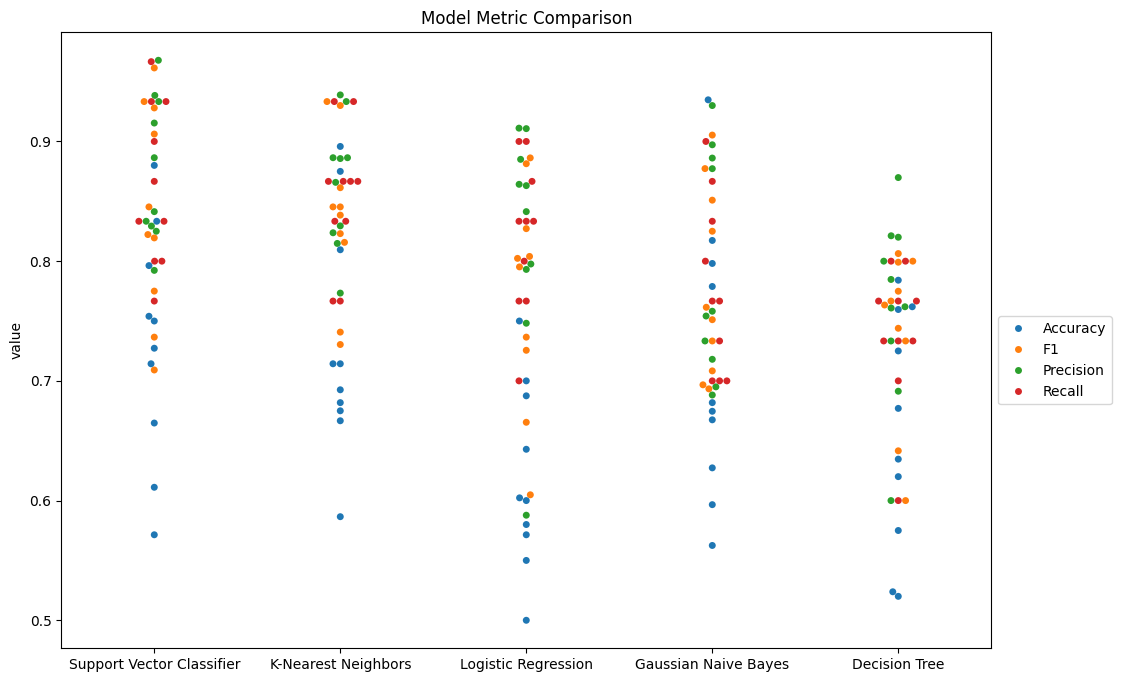

In [134]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='model',y='value',hue='metric',data=df_graph_models)
plt.title('Model Metric Comparison')
plt.xlabel('')
new_labels = ['Support Vector Classifier', 'K-Nearest Neighbors', 'Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree']
plt.gca().set_xticklabels(new_labels)

plt.legend(bbox_to_anchor=(1, .55))
plt.show()


In [135]:
acc_ve,f1_ve,prec_ve,recall_ve= calculate_metrics(voter_ensemble,X_test,y_test)
print('Voting Classifier')
print('Balanced Accuracy:',acc_ve)
print('Weighted F1:',f1_ve)
print('Weighted Precision:',prec_ve)
print('Weighted Recall:',recall_ve)
print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
acc_RF,f1_RF,prec_RF,recall_RF= calculate_metrics(clf,X_test,y_test)
print('Random Forest Classifier')
print('Balanced Accuracy:',acc_RF)
print('Weighted F1:',f1_RF)
print('Weighted Precision:',prec_RF)
print('Weighted Recall:',recall_RF)
print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
acc_GB,f1_GB,prec_GB,recall_GB= calculate_metrics(clf2,X_test,y_test)
print('Gradient Boost Classifier')
print('Balanced Accuracy:',acc_GB)
print('Weighted F1:',f1_GB)
print('Weighted Precision:',prec_GB)
print('Weighted Recall:',recall_GB)

Voting Classifier
Balanced Accuracy: 0.7710592160133445
Weighted F1: 0.8668547145454132
Weighted Precision: 0.8723525014695469
Weighted Recall: 0.8755868544600939
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Random Forest Classifier
Balanced Accuracy: 0.7897321842275971
Weighted F1: 0.876001907477698
Weighted Precision: 0.8791664184337661
Weighted Recall: 0.8826291079812206
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Gradient Boost Classifier
Balanced Accuracy: 0.7594291539245668
Weighted F1: 0.8589402161679197
Weighted Precision: 0.8642973293132595
Weighted Recall: 0.8685446009389671


In [136]:
df_graph_ensembles = pd.DataFrame(columns=['method','val','metric'])

In [137]:
ensembles = {
    'Support Vector Classifier': SupportVector,
    'Voting Classifier': voter_ensemble,
    'Random Forest Classifier': clf,
    'Gradient Boosting Classifier': clf2,
}

In [138]:
random.seed(42)
data = []
for model_name, model in ensembles.items():
    for _ in range(10):
        X_sampled = make_random_samples(X_test, 30)  # Assuming 30 is a suitable sample size
        y_sampled = y_test.loc[X_sampled.index]
        accuracy, F1, precision, recall = calculate_metrics(model, X_sampled, y_sampled)
        metrics = {'Accuracy': accuracy, 'F1': F1, 'Precision': precision, 'Recall': recall}
        for metric_name, value in metrics.items():
            data.append({'method': model_name, 'metric': metric_name, 'val': value})

In [139]:
df_results = pd.DataFrame(data)


In [140]:
df_results

,method,metric,val
0,Support Vector Classifier,Accuracy,0.583333
1,Support Vector Classifier,F1,0.781671
2,Support Vector Classifier,Precision,0.862069
3,Support Vector Classifier,Recall,0.833333
4,Support Vector Classifier,Accuracy,0.700000
...,...,...,...
155,Gradient Boosting Classifier,Recall,0.933333
156,Gradient Boosting Classifier,Accuracy,0.740000
157,Gradient Boosting Classifier,F1,0.839208
158,Gradient Boosting Classifier,Precision,0.847222


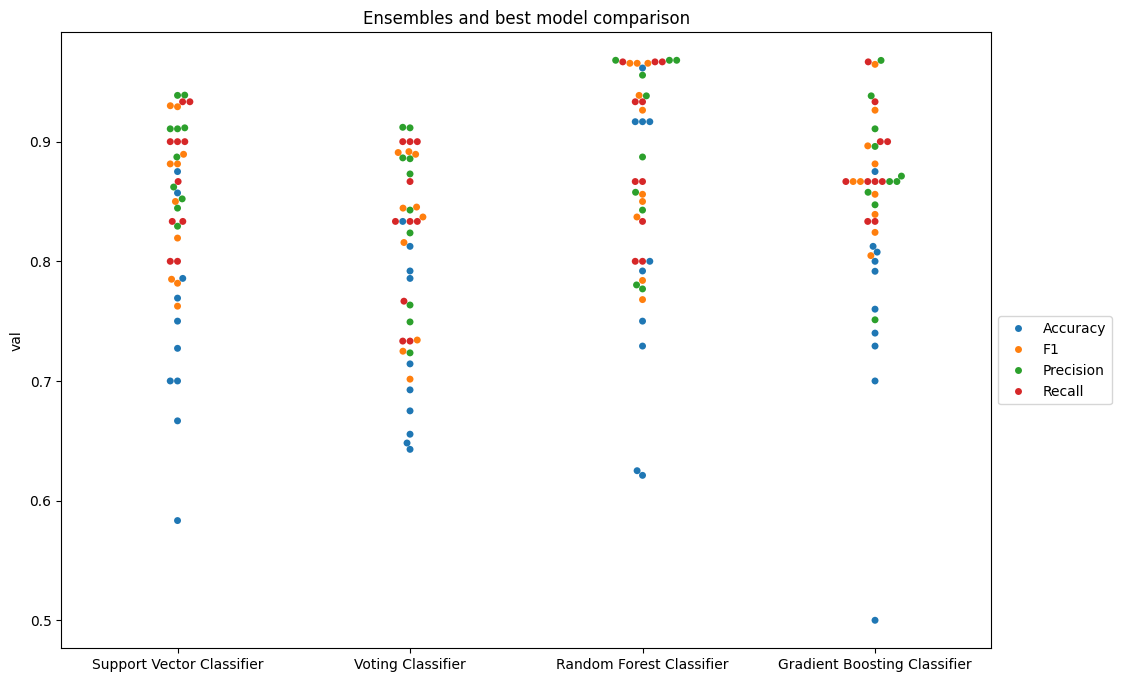

In [141]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='method',y='val',hue='metric',data=df_results)
plt.title('Ensembles and best model comparison')
plt.xlabel('')


plt.legend(bbox_to_anchor=(1, .55))
plt.show()